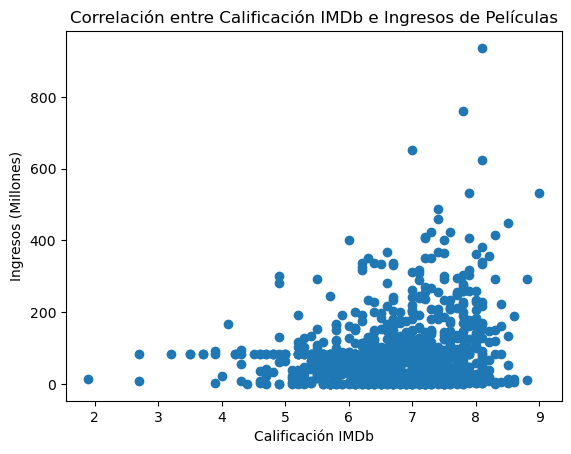

Coeficiente de Correlación: 0.18952736366192582


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carga el conjunto de datos desde el archivo CSV descargado
df = pd.read_csv("IMDB-Movie-Data.csv")  l

# Selecciona las columnas relevantes
selected_columns = ['Title', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)']
df = df[selected_columns]

# Convierte las columnas seleccionadas a un array de NumPy
data_array = df.to_numpy()

# Maneja valores faltantes en 'Rating' y 'Revenue (Millions)'
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].mean(), inplace=True)

# Asegúrate de que las columnas seleccionadas sean de tipo numérico
numeric_columns = ['Rating', 'Revenue (Millions)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Filtra filas que contengan NaN
df = df.dropna(subset=numeric_columns)

# Correlación
correlation = np.corrcoef(df['Rating'], df['Revenue (Millions)'])[0, 1]

# Representa la correlación con matplotlib.pyplot
plt.scatter(df['Rating'], df['Revenue (Millions)'])
plt.title('Correlación entre Calificación IMDb e Ingresos de Películas')
plt.xlabel('Calificación IMDb')
plt.ylabel('Ingresos (Millones)')
plt.show()

print(f"Coeficiente de Correlación: {correlation}")


In [4]:
df.head()

,Title,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions)
0,Guardians of the Galaxy,2014,121,8.1,757074,333.13
1,Prometheus,2012,124,7.0,485820,126.46
2,Split,2016,117,7.3,157606,138.12
3,Sing,2016,108,7.2,60545,270.32
4,Suicide Squad,2016,123,6.2,393727,325.02
